In [42]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [43]:
os.chdir("D:/Algorithmic-Fairness-Interpretability/afi_final_project")

In [44]:
data = pd.read_excel("data/dataproject2024.xlsx")

In [45]:
df = pd.DataFrame(data)

In [46]:
X = df[
    [
        "Job tenure",
        "Age",
        "Car price",
        "Funding amount",
        "Down payment",
        "Loan duration",
        "Monthly payment",
        "Credit event",
        "Married",
        "Homeowner",
    ]
]
y = df["Pred_default (y_hat)"]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [48]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

c:\Users\Catalina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [49]:
y_pred_log = logistic_model.predict(X_test)
y_pred_proba_log = logistic_model.predict_proba(X_test)[:, 1]

In [50]:
mse_logistic = mean_squared_error(y_test, y_pred_log)
mae_logistic = mean_absolute_error(y_test, y_pred_log)
r2_logistic = r2_score(y_test, y_pred_log)

In [51]:
print("Mean Squared Error for Logistic Regression:", mse_logistic)
print("Mean Absolute Error for Logistic Regression:", mae_logistic)
print("Root Mean Squared Error for Logistic Regression:", r2_logistic)
print("Coefficients from Logistic Regression:", logistic_model.coef_)

Mean Squared Error for Logistic Regression: 0.09690444145356662
Mean Absolute Error for Logistic Regression: 0.09690444145356662
Root Mean Squared Error for Logistic Regression: 0.0764330385466978
Coefficients from Logistic Regression: [[-1.03972008e-01 -2.25441889e-02 -4.33413442e-04  4.98536638e-04
   2.30491039e-01  8.87142575e-03  5.49454818e-01  2.95065433e+00
  -1.01287766e+00 -6.70889928e-01]]


In [52]:
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_log))

accuracy = accuracy_score(y_test, y_pred_log)
print(f"Accuracy: {accuracy}")

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1309
           1       0.69      0.34      0.46       177

    accuracy                           0.90      1486
   macro avg       0.80      0.66      0.70      1486
weighted avg       0.89      0.90      0.89      1486

Accuracy: 0.9030955585464334


In [53]:
feature_names = X.columns
coefs = logistic_model.coef_[0]

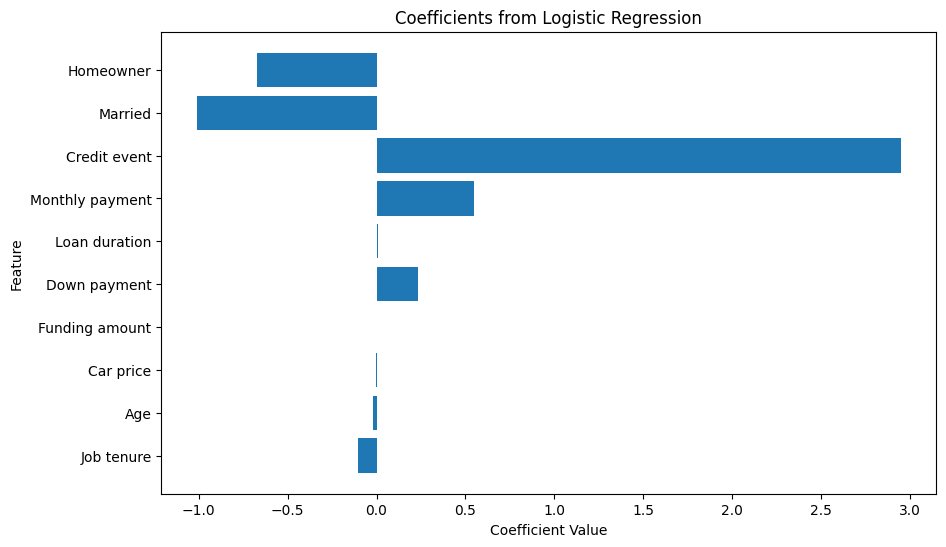

In [54]:
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefs)
plt.title("Coefficients from Logistic Regression")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()